In [59]:
'''Customer churn is a major problem and one of the most important concerns for large companies. Due to the direct effect on the revenues of the companies, especially in
 the telecom field, companies are seeking to develop means to predict potential customer churn. Therefore, finding factors that increase customer churn is important to take #
 necessary actions to reduce this churn. The main contribution of your work is to develop a churn prediction model that assists telecom operators in predicting customers who
  are most likely subject to churn. Perform the following operations as you create the much needed deep learning application.





Create a platform to host the model either web-based or desktop application

Allow users to use the application to enter new data and your model should predict if the supplied data of a new customer can result in a churn or not giving the confidence
 factor of the model

Record a short video to demonstrate how your application works
Create a README.md file to briefly describe your project, functionalities, etc. This should include a link to the video'''

'Customer churn is a major problem and one of the most important concerns for large companies. Due to the direct effect on the revenues of the companies, especially in\n the telecom field, companies are seeking to develop means to predict potential customer churn. Therefore, finding factors that increase customer churn is important to take #\n necessary actions to reduce this churn. The main contribution of your work is to develop a churn prediction model that assists telecom operators in predicting customers who\n  are most likely subject to churn. Perform the following operations as you create the much needed deep learning application.\n\n\n\n\nEvaluate the model’s accuracy and calculate the AUC score\n\nCreate a platform to host the model either web-based or desktop application\n\nAllow users to use the application to enter new data and your model should predict if the supplied data of a new customer can result in a churn or not giving the confidence\n factor of the model\n\nRecord 

In [60]:
#5 to 7 percent
#A low churn rate tends to mean that people are satisfied with a business’s services or have good job satisfaction. Industry professionals generally agree that an annual
#churn rate of 5 to 7 percent is a good range. Anything higher than those percentages may point to poor company performance

In [61]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Loading the dataset
df=pd.read_csv('/content/drive/My Drive/Copy of CustomerChurn_dataset.csv')

In [ ]:
df.head()

In [ ]:
#Using the given datasetLinks to an external site. extract the relevant features that can define a customer churn.
relevant_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'TechSupport',
                      'Contract', 'PaymentMethod', 'TotalCharges', 'Churn']

dff = df[relevant_features]

In [ ]:
#Use your EDA(Exploratory Data Analysis) skills to find out which customer profiles relate to churning a lot.
import matplotlib.pyplot as plt


In [ ]:
dff.head()

In [ ]:
dff.describe()

In [ ]:
dff.shape

In [ ]:
#Try the correlation method

In [ ]:
#Checking for suspected customer profiles that are likely to churn a lot
#First case is senior citizen men, who have a partner and dependents churn a lot
senior_men_partner_dependents = dff[(dff['SeniorCitizen'] == 1) & (dff['gender'] == 'Male') & (dff['Partner'] == 'Yes') & (dff['Dependents'] == 'Yes')] #Subset
senior_men_partner_dependents.head()

In [ ]:
#Calculating the churn rate for the above
total_se_men_partner_dependents = len(senior_men_partner_dependents)
total_se_men_partner_dependents

In [ ]:
#Calculating the number of churns
no_of_senior_churns = len(senior_men_partner_dependents[(senior_men_partner_dependents['Churn'] == 'No')])
no_of_senior_churns

In [ ]:
#The churn rate
churn_rate = (no_of_senior_churns/total_se_men_partner_dependents) * 100
churn_rate
#Churn rate seems high

In [ ]:
#Going to check a few more
#Single young breadwinners
single_dependents = dff[(dff['SeniorCitizen'] == 0) & (dff['Partner'] == 'No') & (dff['Dependents'] == 'Yes')] #Subset
single_dependents.head()

In [ ]:
#Calculating the number of churns
no_of_single_churns = len(single_dependents[(single_dependents['Churn'] == 'No')])
no_of_single_churns

In [ ]:
#Calculating the number of customers
total_single_dependents = len(single_dependents)
total_single_dependents

In [ ]:
#The churn rate
churn_rate = (no_of_single_churns/total_single_dependents) * 100
churn_rate
#Churn rate seems high

In [ ]:
dff.head()

In [108]:
#Checking for null values
null_values = dff.isnull() #Returns a boolean
null_values #False - does not contain a null value

null_values_sum = null_values.sum()
null_values_sum


gender             0
SeniorCitizen      0
Partner            0
Dependents         0
tenure             0
PhoneService       0
MultipleLines      0
InternetService    0
TechSupport        0
Contract           0
PaymentMethod      0
TotalCharges       0
dtype: int64

In [119]:
#Encoding categorical variables
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()

features = ['gender', 'Partner' , 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'TechSupport', 'Contract', 'PaymentMethod']

#Using a for loop to encode each column
for feature in features:
  df[feature] = lab.fit_transform(df[feature])


df['Churn'] = lab.fit_transform(df['Churn'])

In [110]:
dff.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,TechSupport,Contract,PaymentMethod,TotalCharges
0,0,0,1,0,1,0,1,0,0,0,2,29.85
1,1,0,0,0,34,1,0,0,0,1,3,1889.5
2,1,0,0,0,2,1,0,0,0,0,3,108.15
3,1,0,0,0,45,0,1,0,2,1,0,1840.75
4,0,0,0,0,2,1,0,1,0,0,2,151.65


In [120]:
#Checking correlation
correlation = df.corr()
correlation['Churn'].sort_values(ascending=False)

correlation
#Just checking the level of influence

<ipython-input-120-f1db59571d1d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,TechSupport,Contract,PaymentMethod,MonthlyCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.006825,0.000126,0.017352,-0.014569,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.151268,-0.142554,-0.038551,0.220173,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.126733,0.294806,-0.154798,0.096848,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.133524,0.243187,-0.040292,-0.113890,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.322942,0.671607,-0.370436,0.247900,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.019158,0.002247,-0.004184,0.247398,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.011466,0.110842,-0.176793,0.433576,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.026047,0.099721,0.086140,-0.323260,-0.047291
TechSupport,-0.006825,-0.151268,0.126733,0.133524,0.322942,-0.019158,0.011466,-0.026047,1.000000,0.425367,-0.104670,-0.008682,-0.282492
Contract,0.000126,-0.142554,0.294806,0.243187,0.671607,0.002247,0.110842,0.099721,0.425367,1.000000,-0.227543,-0.074195,-0.396713


In [121]:
#Using the features in (1) define and train a Multi-Layer Perceptron model using the Functional API
import numpy as np
import tensorflow as tf
import keras
from keras import layers
from sklearn.model_selection import train_test_split
#from tensorflow.keras.layers import Input, Dense, Dropout

In [122]:
dff.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,TechSupport,Contract,PaymentMethod,TotalCharges
0,0,0,1,0,1,0,1,0,0,0,2,29.85
1,1,0,0,0,34,1,0,0,0,1,3,1889.5
2,1,0,0,0,2,1,0,0,0,0,3,108.15
3,1,0,0,0,45,0,1,0,2,1,0,1840.75
4,0,0,0,0,2,1,0,1,0,0,2,151.65


In [123]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,No,...,No,0,No,No,0,Yes,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,Yes,...,Yes,0,No,No,1,No,3,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,Yes,...,No,0,No,No,0,Yes,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,Yes,...,Yes,2,No,No,1,No,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,No,...,No,0,No,No,0,Yes,2,70.70,151.65,1


In [151]:
#Spliting dataset
dft = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'TechSupport',
                      'Contract', 'PaymentMethod', 'TotalCharges']
X = df[dft]
y = df['Churn']
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,test_size=0.3,random_state=42)

In [125]:
#Input layer
inputs = keras.Input(shape=(len(dft),)) #This is a basic graph with three layers. To build this model using the functional API, start by creating an input node:


In [126]:
inputs.shape

TensorShape([None, 12])

In [127]:
inputs.dtype

tf.float32

In [128]:
#Hidden layers
dense = layers.Dense(64, activation="relu")
x = dense(inputs)

In [129]:
#Dropout layer
x = layers.Dropout(0.2)(x)

In [130]:
dense = layers.Dense(32, activation="relu")
x = dense(x)

In [131]:
#Dropout layer
x = layers.Dropout(0.2)(x)

In [132]:
#Output layer
outputs = layers.Dense(1, activation="sigmoid")(x)

In [133]:
#Creating the model
model = keras.Model(inputs=inputs, outputs=outputs, name="Churn_Model")


In [134]:
model.summary()

Model: "Churn_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 12)]              0         
                                                                 
 dense_6 (Dense)             (None, 64)                832       
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2945 (11.50 KB)
Trainable params: 2945 (1

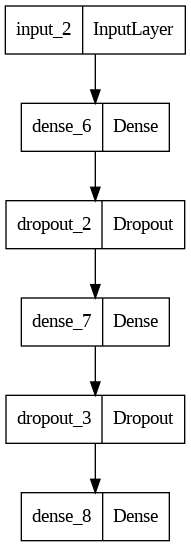

In [135]:
keras.utils.plot_model(model, "my_first_model.png")


In [142]:
#Compiling the model
model.compile(
    loss=keras.losses.binary_crossentropy,
    optimizer = 'Adam',
    metrics=['accuracy'],
)

In [143]:
#Classifier
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=300, random_state= 10)


In [152]:
#from sklearn.model_selection import cross_val_score
#all_accuracies = cross_val_score(classifier, Xtrain, Ytrain, cv=5) #Cross validation to compute the score five times
#all_accuracies

ValueError: ignored

In [98]:
#all_accuracies.mean()

In [153]:
from sklearn.model_selection import GridSearchCV


In [154]:
#Hyperparameter grid for grid search
grid_param = {
    'n_estimators': [100, 300, 500, 800, 1000],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}


In [156]:
'''#Performing the grid search
gd_sr = GridSearchCV(estimator=classifier,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1)

gd_sr.fit(Xtrain, Ytrain)'''

"#Performing the grid search\ngd_sr = GridSearchCV(estimator=classifier,\n                     param_grid=grid_param,\n                     scoring='accuracy',\n                     cv=5,\n                     n_jobs=-1)\n\ngd_sr.fit(Xtrain, Ytrain)"

In [103]:
#best_parameters = gd_sr.best_params_
#best_parameters

In [104]:
#best_result = gd_sr.best_score_
#best_result

In [158]:
#Training the model
#history = model.fit(Xtrain, Ytrain, batch_size=32, epochs=10, validation_split=0.2)
